In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load training data
df= pd.read_csv("./train.csv")
Y= df["label"]
X= df.drop("label",axis=1)

In [3]:
# One Hot Encoding for Y
from keras.utils.np_utils import to_categorical
Y_cat =to_categorical(Y)
Y_cat.shape

C:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(42000, 10)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


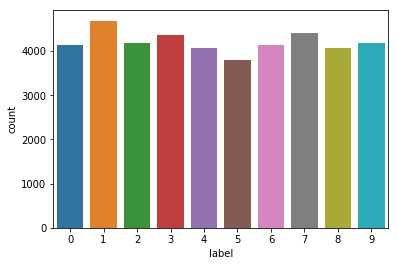

In [4]:
# No. of digits
sns.countplot(Y)
print(Y.value_counts())

In [5]:
#>> Check for null value
X.isnull().any().any()

#>> Normaliztion
# X values are ranging from 0 to 255    
X.describe()
X =X /255.0

In [6]:
#>> Reshaping Data
# keras require a shape 4D tensor
#[Batch Size, Height of Image, Width of Image, No. of Color Channels]

X=X.values.reshape(-1,28,28,1)
X.shape

(42000, 28, 28, 1)

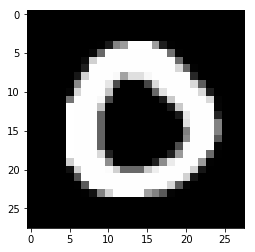

In [8]:
# Change Value of num to plot Different Images
num =4
plt.imshow(X[num][:,:,0],cmap="gray")

In [9]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y_cat, test_size = 0.1)

In [10]:
# Importing model config
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import RMSprop

In [17]:
model= Sequential()

model.add(Conv2D(32,(4,4),padding="Same",activation="relu", input_shape=(28,28,1)  ))
model.add(Conv2D(32, (4,4), padding="Same", activation="relu"))
model.add(MaxPool2D())

model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),padding="Same",activation="relu" ))
model.add(Conv2D(32, (3,3), padding="Same", activation="relu"))
model.add(MaxPool2D(strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))

model.compile(RMSprop(lr=0.001),"categorical_crossentropy",metrics=["accuracy"]   )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
__________

1) **1 \* 32 \* 16 (Weights) + 32(bias) = 544 learning parameters**                                 
    Convolution layer => with 32 nodes/no. of filters; having size of (4\*4) each; Input channel/nodes from previous is 1

                                    
2) **32 \* 32 \* 16 (Weights) + 32(bias) = 16416 learning parameters**                   
    Convolution layer; with 32 nodes/no. of filters; having size of (4\*4) each; Input channel/nodes from previous layer are 32
             
3) MaxPooling layer of size (2,2) it decreases height and width by 2. and it does not have any parameters for learning.

4) **32 \* 32 \* 9 (Weights) + 32(bias) = 9248 learning parameters**                                 
    Convolution layer => with 32 nodes/no. of filters; having size of (3\*3) each; Input channel/nodes from previous is 32

                                    
5) **32 \* 32 \* 9 (Weights) + 32(bias) = 9248 learning parameters**                   
    Convolution layer; with 32 nodes/no. of filters; having size of (3\*3) each; Input channel/nodes from previous layer are 32
             
6) MaxPooling layer of size (2,2) it decreases height and width by 2. and it does not have any parameters for learning.

7) Flatten, It reshape(-1) in a 1D , ** 7 \* 7 \* 32 **

8) Dense, Fully Connected layer with 256 nodes, **1568 * 256 (Weights) + 256 bias =401664 learning parameters**

9) Dropout layer with 40% units to prevent overfitting.

10) Dense, Fully Connected layer with 10 nodes [0,1...,9] for output.



In [18]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_reduction= ReduceLROnPlateau(monitor='val_acc',factor=0.4, min_lr=0.00001,patience=1,verbose=1)

In [19]:
# Training model with lr reduction and Early stopping
history =model.fit(X_train,Y_train,batch_size=64, epochs=15, validation_split=0.1,verbose=1,
         callbacks=[lr_reduction])

Train on 34020 samples, validate on 3780 samples
Epoch 1/15
34020/34020 [==============================] - 38s 1ms/step - loss: 1.6049 - acc: 0.4092 - val_loss: 0.4160 - val_acc: 0.8733
Epoch 2/15
34020/34020 [==============================] - 37s 1ms/step - loss: 0.3036 - acc: 0.9035 - val_loss: 0.1286 - val_acc: 0.9611
Epoch 3/15
34020/34020 [==============================] - 37s 1ms/step - loss: 0.1501 - acc: 0.9538 - val_loss: 0.0938 - val_acc: 0.9701
Epoch 4/15
34020/34020 [==============================] - 37s 1ms/step - loss: 0.1073 - acc: 0.9666 - val_loss: 0.0791 - val_acc: 0.9767
Epoch 5/15
34020/34020 [==============================] - 37s 1ms/step - loss: 0.0879 - acc: 0.9728 - val_loss: 0.0689 - val_acc: 0.9812
Epoch 6/15
34020/34020 [==============================] - 37s 1ms/step - loss: 0.0742 - acc: 0.9772 - val_loss: 0.0597 - val_acc: 0.9825cc: 0.977 -  - ETA: 0s - loss: 0.0738 - acc:
Epoch 7/15
34020/34020 [==============================] - 37s 1ms/step - loss: 0.0633

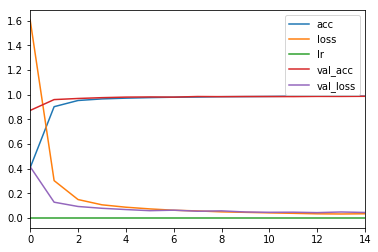

In [20]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.plot()

In [22]:
# Training model with 5 more epochs reduction and Early stopping
history =model.fit(X_train,Y_train,batch_size=64, epochs=5, validation_split=0.1,verbose=1,
         callbacks=[lr_reduction])

Train on 34020 samples, validate on 3780 samples
Epoch 1/5
34020/34020 [==============================] - 37s 1ms/step - loss: 0.0245 - acc: 0.9923 - val_loss: 0.0412 - val_acc: 0.9892
Epoch 2/5
34020/34020 [==============================] - 37s 1ms/step - loss: 0.0236 - acc: 0.9929 - val_loss: 0.0414 - val_acc: 0.98893s - loss: 0.0238 - ETA: 0s - loss: 0.0235 - acc: 
Epoch 3/5
34020/34020 [==============================] - 37s 1ms/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0385 - val_acc: 0.9894
Epoch 4/5
34020/34020 [==============================] - 37s 1ms/step - loss: 0.0210 - acc: 0.9934 - val_loss: 0.0449 - val_acc: 0.9899
Epoch 5/5
33984/34020 [============================>.] - ETA: 0s - loss: 0.0208 - acc: 0.9936
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.
34020/34020 [==============================] - 37s 1ms/step - loss: 0.0208 - acc: 0.9936 - val_loss: 0.0440 - val_acc: 0.9878


In [23]:
## Saving model
from keras.models import load_model
model.save("mnist_5.h5")
#model= load_model("mnist_5.h5")

In [24]:
# Predict from model on Validation data
Y_pred = model.predict(X_val)

# argmax for predicted value 
y_predicted= np.argmax(Y_pred,axis = 1) 

# argmax for true values
y_true = np.argmax(Y_val,axis = 1)

In [25]:
# Validation data Score
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_predicted)

0.9928571428571429

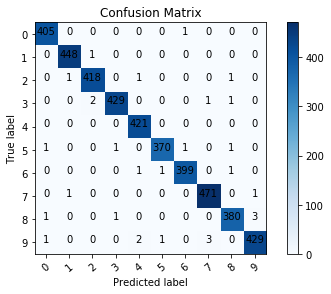

In [27]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, rangee):

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xticks(rangee, rangee, rotation=40)
    plt.yticks(rangee, rangee)

   
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center")
                

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# confusion matrix
conf_matrix = confusion_matrix(y_true, y_predicted) 
#print(conf_matrix)

# plot the confusion matrix
plot_confusion_matrix(conf_matrix, rangee = range(10)) 

In [34]:
# Finding wrong predicted images
error = y_true - y_predicted !=0

Y_true_err = y_true[error]
Y_pred_err = y_predicted[error]
X_val_err =  X_val[error]
print("Wrong preicted Y true values",Y_true_err)

Wrong preicted Y true values [9 8 8 8 3 6 9 6 0 5 5 1 5 3 2 2 7 9 2 3 9 8 5 9 7 9 6 9 3 8]


## Try different values of num, for Wrong Predicted images

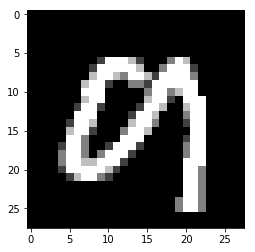

True Value:  9
Predicted Value:  0


In [35]:
# 0 for first wrong predicted image
num = 0

plt.imshow(X_val_err[num][:,:,0],cmap="gray")
plt.show()
print("True Value: ",Y_true_err[num] )
print("Predicted Value: ",Y_pred_err[num])

In [32]:
# Retraining model on Validation data 

history2 =model.fit(X_val,Y_val,batch_size=32, epochs=2, validation_split=0.1,verbose=1,
         callbacks=[lr_reduction,EarlyStopping(monitor='loss', patience=2)])

Train on 3780 samples, validate on 420 samples
Epoch 1/2
3780/3780 [==============================] - 5s 1ms/step - loss: 0.0267 - acc: 0.9926 - val_loss: 0.0109 - val_acc: 0.9952
Epoch 2/2
3780/3780 [==============================] - 5s 1ms/step - loss: 0.0333 - acc: 0.9907 - val_loss: 0.0109 - val_acc: 0.9952


In [33]:
# Again, Checking Accuracy score on Validation data

y_pred2=model.predict(X_train)
y_predd2=np.argmax(y_pred2,axis=1)
y_truee2 = np.argmax(Y_train,axis=1)

accuracy_score(y_truee2,y_predd2)

0.9963756613756614

In [36]:
# Importing test.csv
df_tst = pd.read_csv("./test.csv")

# Reshaping test data
df_tst=df_tst.values.reshape(-1,28,28,1)

# Predicting with model
df_tst_result=model.predict(df_tst)
y_result=np.argmax(df_tst_result,axis=1)

In [37]:
range_n=np.arange(1,len(y_result) + 1 )

final_results=pd.concat([pd.DataFrame(range_n) , pd.DataFrame(y_result)],axis=1)
final_results.columns=(["ImageId","Label"])

final_results.to_csv("result.csv")
# Upload "result.csv"